<a href="https://colab.research.google.com/github/Raj-Vaghela/Patient-Readmission-Prediction-Part-1-Google-Colab/blob/main/BDPA_CW_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, normaltest

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv('/content/drive/My Drive/Raj Vaghela/diabetic_data.csv', na_values='?' , low_memory=False)

In [57]:
for column in df:
        value_counts = df[column].value_counts() # Calculate value counts for the current column
        total_count = len(df) # Calculate total count for the column

        max_value = value_counts.idxmax()
        max_count = value_counts.max()
        max_percentage = (max_count / total_count) * 100

        print(f"Column: {column}")
        print(f"Value: {max_value}, Percentage Occurrence: {max_percentage:.2f}%, Count: {max_count}\n")


Column: encounter_id
Value: 2278392, Percentage Occurrence: 0.00%, Count: 1

Column: patient_nbr
Value: 88785891, Percentage Occurrence: 0.04%, Count: 40

Column: race
Value: Caucasian, Percentage Occurrence: 74.78%, Count: 76099

Column: gender
Value: Female, Percentage Occurrence: 53.76%, Count: 54708

Column: age
Value: [70-80), Percentage Occurrence: 25.62%, Count: 26068

Column: weight
Value: [75-100), Percentage Occurrence: 1.31%, Count: 1336

Column: admission_type_id
Value: 1, Percentage Occurrence: 53.05%, Count: 53990

Column: discharge_disposition_id
Value: 1, Percentage Occurrence: 59.19%, Count: 60234

Column: admission_source_id
Value: 7, Percentage Occurrence: 56.50%, Count: 57494

Column: time_in_hospital
Value: 3, Percentage Occurrence: 17.45%, Count: 17756

Column: payer_code
Value: MC, Percentage Occurrence: 31.88%, Count: 32439

Column: medical_specialty
Value: InternalMedicine, Percentage Occurrence: 14.38%, Count: 14635

Column: num_lab_procedures
Value: 1, Percen

In [58]:
print(df.describe())
print('\nshape of original data:',df.shape)

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [59]:
df.drop(columns=['encounter_id'], inplace = True)

In [60]:
missingValues = df.isnull().sum()
missingValues = missingValues[missingValues>0]
missingPercentage = (missingValues/len(df))*100

missingInfo = pd.DataFrame({'Missing Values': missingValues, 'Missing Percentage': missingPercentage})
print(missingInfo)
print('\nShape after dropping encounter_id:',df.shape)

                   Missing Values  Missing Percentage
race                         2273            2.233555
weight                      98569           96.858479
payer_code                  40256           39.557416
medical_specialty           49949           49.082208
diag_1                         21            0.020636
diag_2                        358            0.351787
diag_3                       1423            1.398306

Shape after dropping encounter_id: (101766, 49)


In [61]:
df['readmitted'] = df['readmitted'].replace({'<30':1, '>30':0, 'NO':0}, )
unique_values = df['readmitted'].unique()
print(unique_values)

[0 1]


In [62]:
columns_to_drop_from_ProblemStatement = ['repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
col_with_over_90perc_MisVal = missingPercentage[missingPercentage>90].index.tolist()
columns_to_drop = columns_to_drop_from_ProblemStatement + col_with_over_90perc_MisVal
df.drop(columns=columns_to_drop, inplace=True)
print('\nShape of data after dropping cols mentioned in Problem Statement and cols with more than 90% missing values')
print(df.shape)


Shape of data after dropping cols mentioned in Problem Statement and cols with more than 90% missing values
(101766, 31)


In [63]:
df_without_null = df.dropna()
df_without_null.shape

(26755, 31)

In [64]:
print(df_without_null.select_dtypes(include=['int64', 'float64']).nunique().to_frame())

                              0
patient_nbr               19437
admission_type_id             6
discharge_disposition_id     23
admission_source_id          14
time_in_hospital             14
num_lab_procedures          110
num_procedures                7
num_medications              75
number_outpatient            20
number_emergency             31
number_inpatient             17
number_diagnoses             13
readmitted                    2


Summary statistics for column 'patient_nbr':
count    2.675500e+04
mean     5.732865e+07
std      3.710987e+07
min      7.290000e+02
25%      2.425177e+07
50%      4.401274e+07
75%      9.230198e+07
max      1.893659e+08
Name: patient_nbr, dtype: float64
Variance :  1377142400434606.8


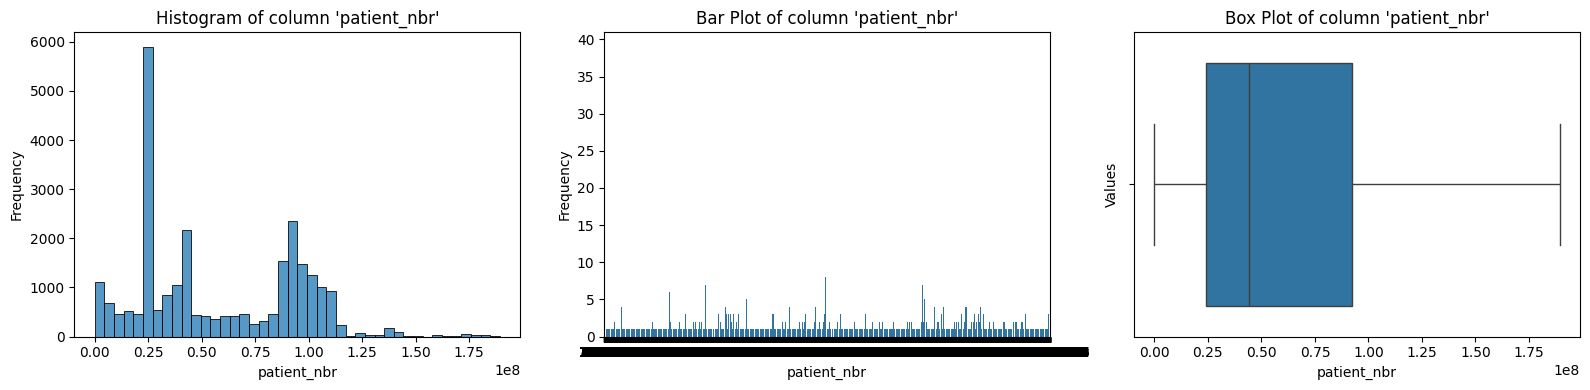

Summary statistics for column 'admission_type_id':
count    26755.000000
mean         2.019137
std          0.946664
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: admission_type_id, dtype: float64
Variance :  0.8961726117847992


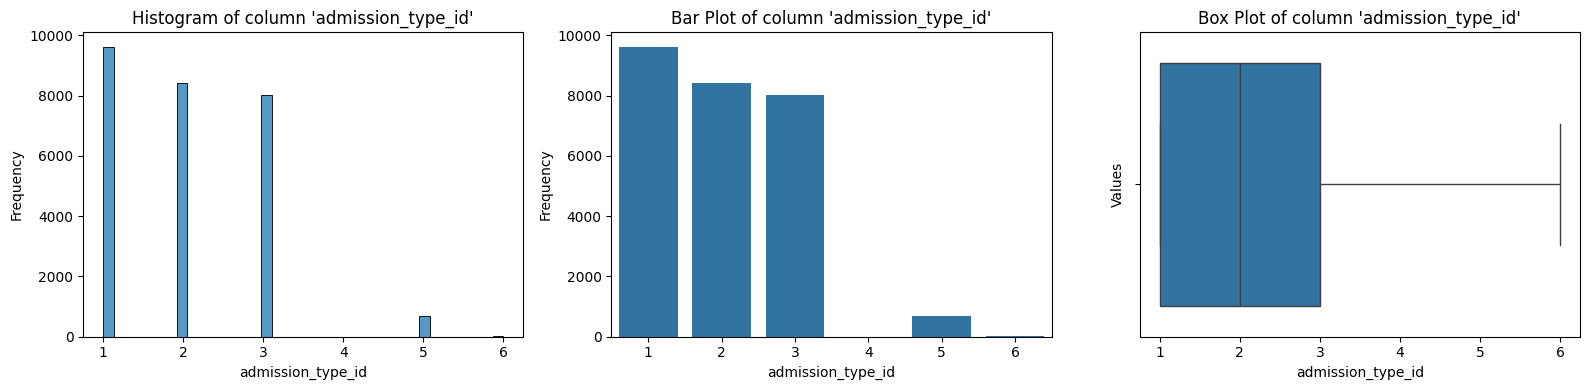

Summary statistics for column 'discharge_disposition_id':
count    26755.000000
mean         2.959821
std          4.327149
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         28.000000
Name: discharge_disposition_id, dtype: float64
Variance :  18.724220944114993


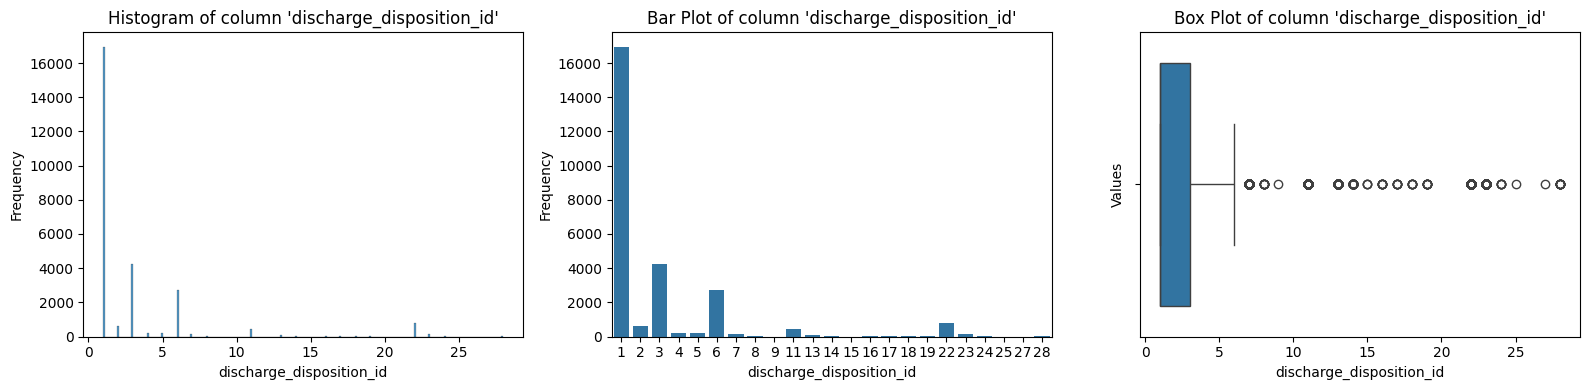

Summary statistics for column 'admission_source_id':
count    26755.000000
mean         4.972267
std          3.522615
min          1.000000
25%          1.000000
50%          7.000000
75%          7.000000
max         22.000000
Name: admission_source_id, dtype: float64
Variance :  12.408814458196035


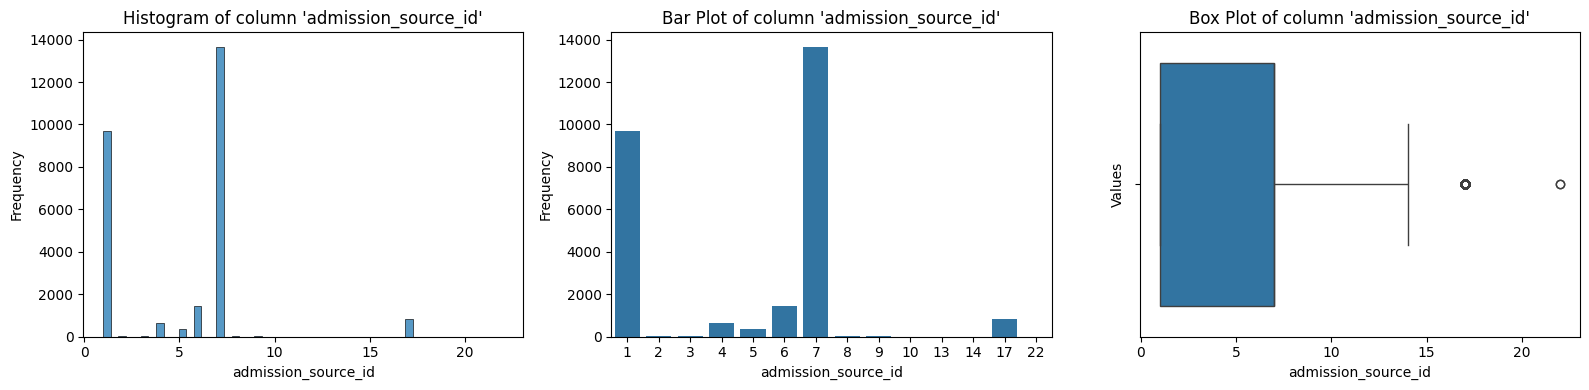

Summary statistics for column 'time_in_hospital':
count    26755.000000
mean         4.317922
std          2.949791
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
Variance :  8.701269210463375


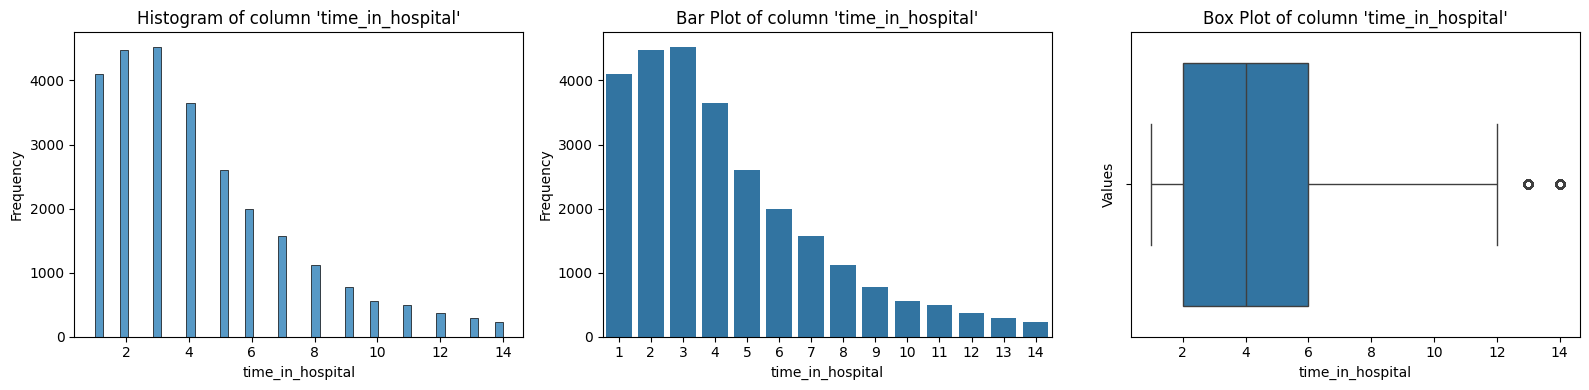

Summary statistics for column 'num_lab_procedures':
count    26755.000000
mean        40.756681
std         19.965546
min          1.000000
25%         29.000000
50%         42.000000
75%         54.000000
max        132.000000
Name: num_lab_procedures, dtype: float64
Variance :  398.62300939195205


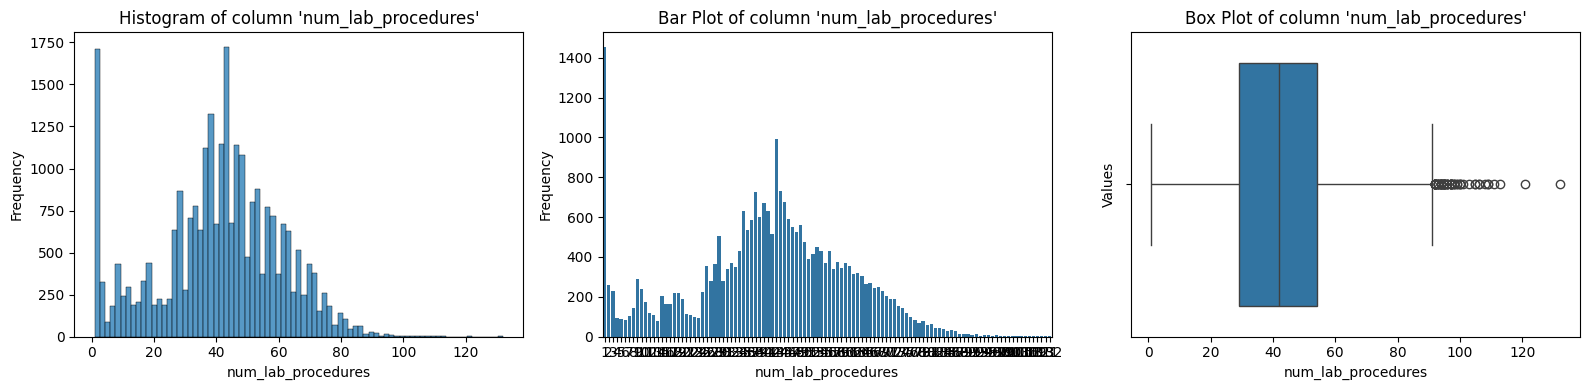

Summary statistics for column 'num_procedures':
count    26755.000000
mean         1.475575
std          1.749729
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64
Variance :  3.061552965523614


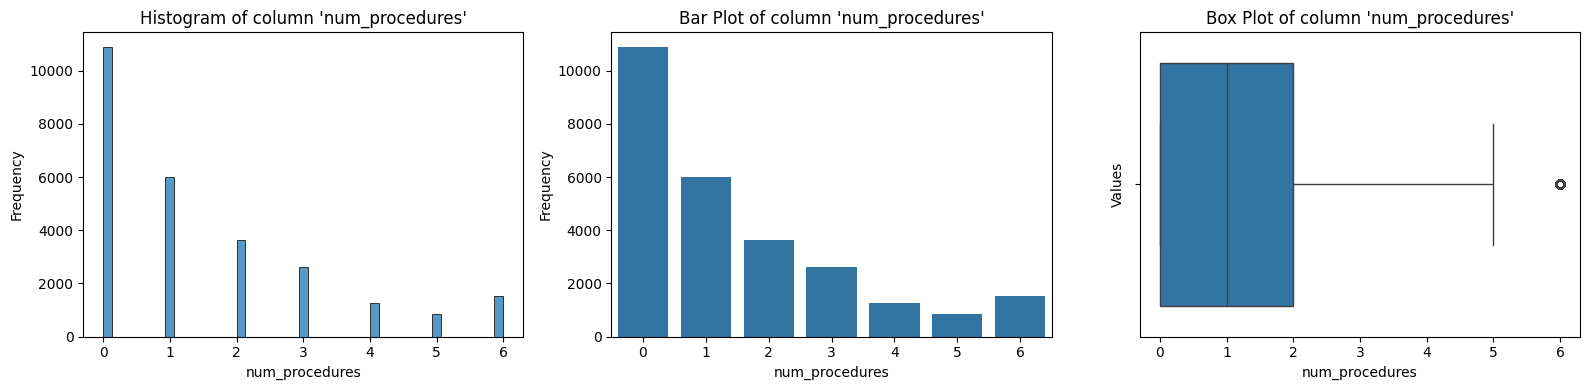

Summary statistics for column 'num_medications':
count    26755.000000
mean        16.246720
std          8.609362
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64
Variance :  74.12111832626861


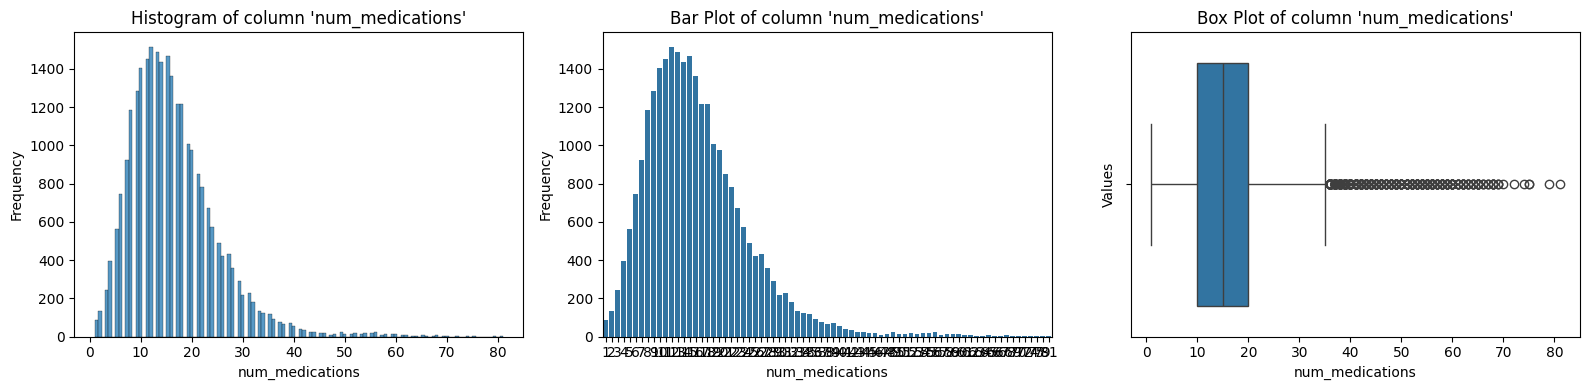

Summary statistics for column 'number_outpatient':
count    26755.000000
mean         0.290712
std          0.998707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         38.000000
Name: number_outpatient, dtype: float64
Variance :  0.9974150383526468


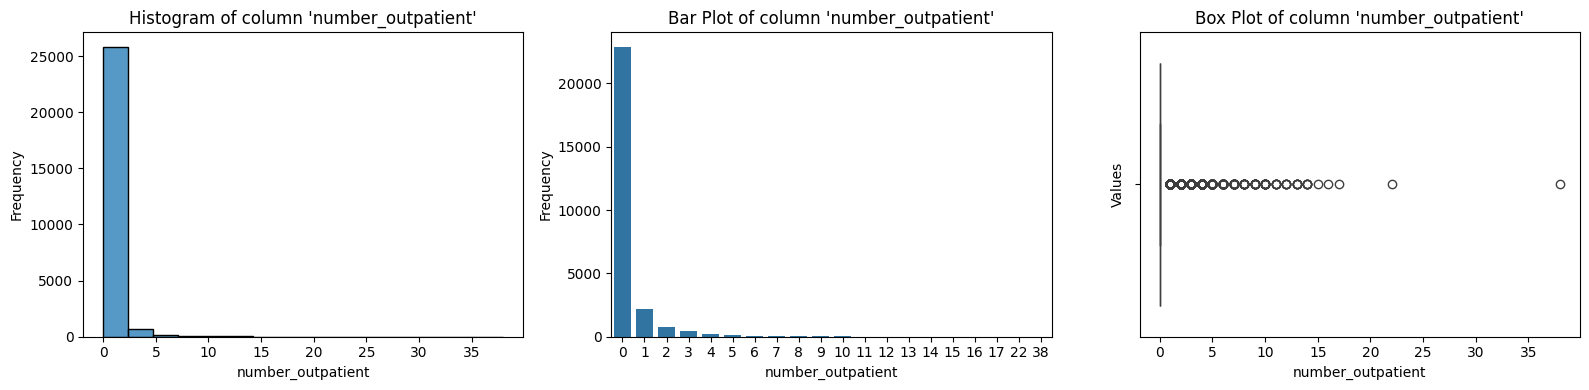

Summary statistics for column 'number_emergency':
count    26755.000000
mean         0.311755
std          1.437214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64
Variance :  2.0655847017854505


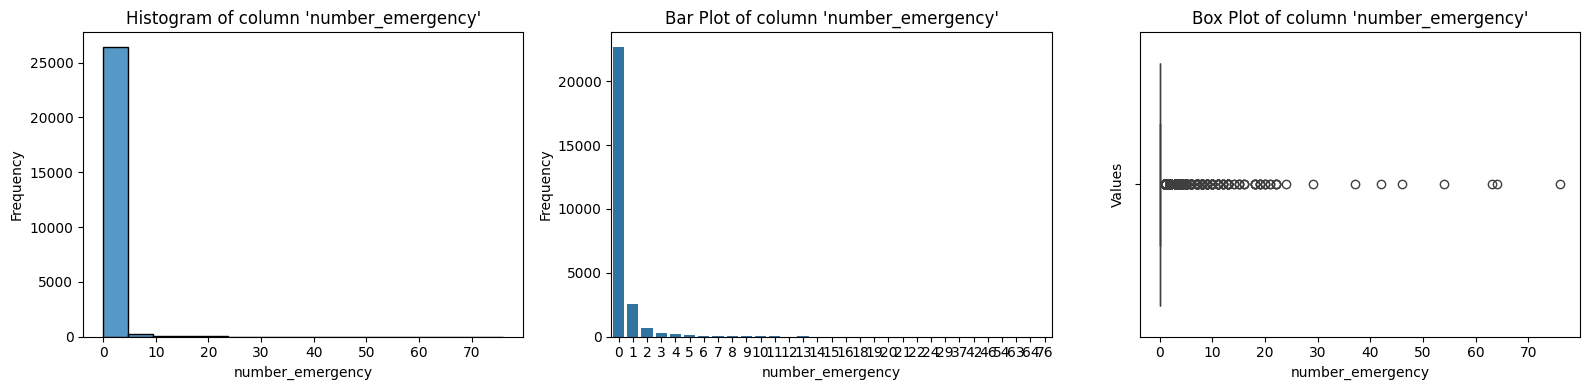

Summary statistics for column 'number_inpatient':
count    26755.000000
mean         0.670641
std          1.367311
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         16.000000
Name: number_inpatient, dtype: float64
Variance :  1.8695405736271644


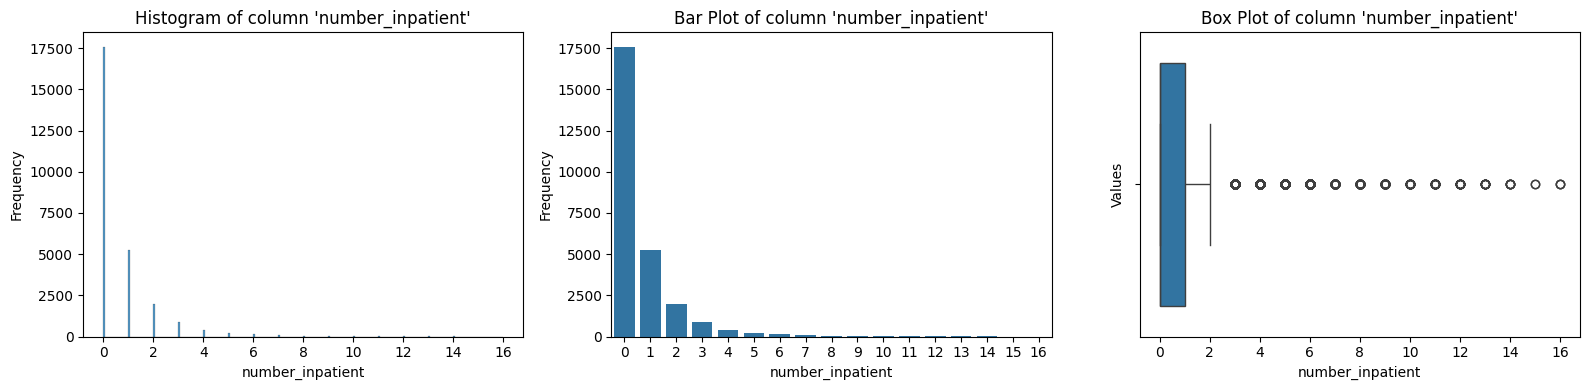

Summary statistics for column 'number_diagnoses':
count    26755.000000
mean         7.355522
std          1.895473
min          3.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64
Variance :  3.592818702825987


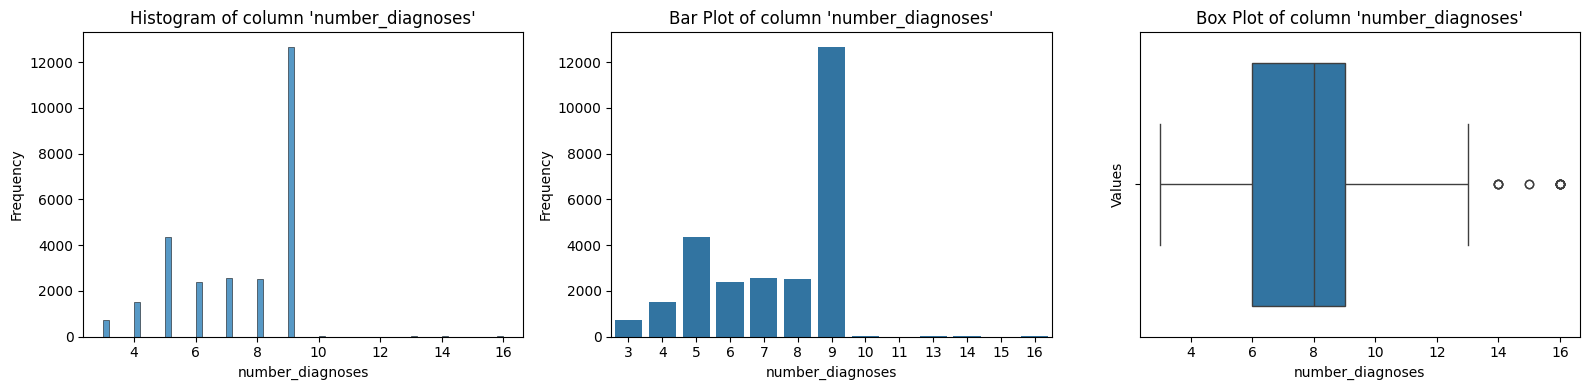

Summary statistics for column 'readmitted':
count    26755.000000
mean         0.106784
std          0.308844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: readmitted, dtype: float64
Variance :  0.09538456844434366


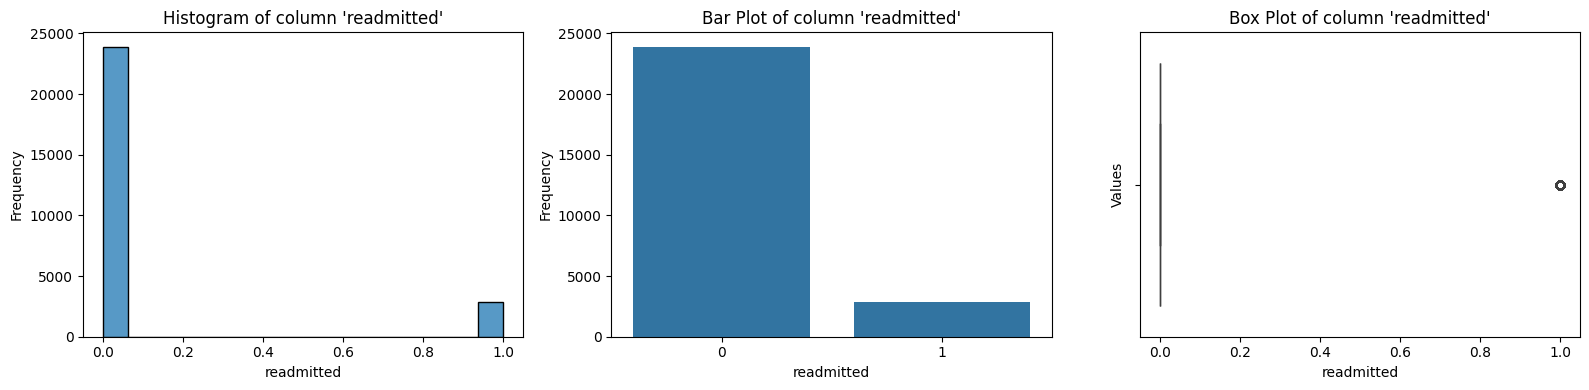

In [65]:
for column in df_without_null.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Summary statistics for column '{column}':")
    print(df_without_null[column].describe())
    print('Variance : ', df_without_null[column].var())
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Histogram using Seaborn
    sns.histplot(data=df_without_null, x=column, ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f"Histogram of column '{column}'")

    # Bar plot using Seaborn
    value_counts = df_without_null[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f"Bar Plot of column '{column}'")

    # Box plot using Seaborn
    sns.boxplot(data=df_without_null, x=column, ax=axes[2])
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Values')
    axes[2].set_title(f"Box Plot of column '{column}'")

    plt.tight_layout()
    plt.show()


In [66]:
# List of columns for which you want to calculate the percentage of different individual values
cols_of_interest = ['number_inpatient','number_emergency','number_outpatient']
percentage_occurrences = {}

# Iterate through the columns of interest
for column in cols_of_interest:
      value_counts = df_without_null[column].value_counts() # Calculate value counts for the current column
      total_count = len(df_without_null) # Calculate total count for the column

      max_value = value_counts.idxmax()
      max_count = value_counts.max()
      max_percentage = (max_count / total_count) * 100

      print(f"Column: {column}")
      print(f"Value: {max_value}, Percentage Occurrence: {max_percentage:.2f}%, Count: {max_count}\n")



Column: number_inpatient
Value: 0, Percentage Occurrence: 65.72%, Count: 17583

Column: number_emergency
Value: 0, Percentage Occurrence: 84.86%, Count: 22705

Column: number_outpatient
Value: 0, Percentage Occurrence: 85.57%, Count: 22895



In [67]:
df_without_null.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

In [68]:
df_without_null.select_dtypes(include=['int64', 'float64']).columns

Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted'],
      dtype='object')

In [69]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

df_no_outliers = df_without_null.copy()

for column in df_no_outliers.select_dtypes(include=['int64', 'float64']).columns:
    if column not in ['readmitted','number_outpatient','number_emergency','number_inpatient','admission_type_id','discharge_disposition_id','admission_source_id']: #since all these numbers have very long tails and IDs are categorical data
        outliers = identify_outliers_iqr(df_no_outliers[column])
        num_outliers = outliers.sum()
        df_no_outliers = df_no_outliers.loc[~outliers]
        print(f"Total outliers in '{column}': {num_outliers}")
        print(f"-outliers from '{column}' gave shape {df_no_outliers.shape}")



Total outliers in 'patient_nbr': 0
-outliers from 'patient_nbr' gave shape (26755, 31)
Total outliers in 'time_in_hospital': 517
-outliers from 'time_in_hospital' gave shape (26238, 31)
Total outliers in 'num_lab_procedures': 61
-outliers from 'num_lab_procedures' gave shape (26177, 31)
Total outliers in 'num_procedures': 1445
-outliers from 'num_procedures' gave shape (24732, 31)
Total outliers in 'num_medications': 424
-outliers from 'num_medications' gave shape (24308, 31)
Total outliers in 'number_diagnoses': 9
-outliers from 'number_diagnoses' gave shape (24299, 31)


In [70]:
df_no_outliers.shape

(24299, 31)

In [71]:
# List of columns for which you want to calculate the percentage of different individual values
cols_of_interest = ['number_inpatient','number_emergency','number_outpatient']
percentage_occurrences = {}

# Iterate through the columns of interest
for column in cols_of_interest:
    # Calculate value counts for the current column
    value_counts = df_without_null[column].value_counts()

    # Calculate total count for the column
    total_count = len(df_without_null)

    print(f"Column: {column}")
    # Iterate through unique values and print their occurrence percentage and count
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"Value: {value}, Percentage Occurrence: {percentage:.2f}%, Count: {count}")

    print()  # Add a newline between columns


Column: number_inpatient
Value: 0, Percentage Occurrence: 65.72%, Count: 17583
Value: 1, Percentage Occurrence: 19.67%, Count: 5263
Value: 2, Percentage Occurrence: 7.40%, Count: 1981
Value: 3, Percentage Occurrence: 3.36%, Count: 900
Value: 4, Percentage Occurrence: 1.49%, Count: 398
Value: 5, Percentage Occurrence: 0.78%, Count: 209
Value: 6, Percentage Occurrence: 0.50%, Count: 134
Value: 7, Percentage Occurrence: 0.32%, Count: 86
Value: 8, Percentage Occurrence: 0.23%, Count: 62
Value: 9, Percentage Occurrence: 0.19%, Count: 51
Value: 11, Percentage Occurrence: 0.10%, Count: 26
Value: 10, Percentage Occurrence: 0.09%, Count: 25
Value: 12, Percentage Occurrence: 0.06%, Count: 16
Value: 13, Percentage Occurrence: 0.04%, Count: 10
Value: 14, Percentage Occurrence: 0.02%, Count: 6
Value: 16, Percentage Occurrence: 0.01%, Count: 3
Value: 15, Percentage Occurrence: 0.01%, Count: 2

Column: number_emergency
Value: 0, Percentage Occurrence: 84.86%, Count: 22705
Value: 1, Percentage Occurre

In [72]:
df_no_outliers.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

In [73]:
col_to_normalize = ['number_inpatient','number_emergency','number_outpatient','num_medications','num_procedures','num_lab_procedures','time_in_hospital','number_diagnoses']

def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

df_no_outliers[col_to_normalize] = df_no_outliers[col_to_normalize].apply(min_max_scaling)
print(df_no_outliers)

        patient_nbr       race  gender       age  admission_type_id  \
20446      20123568  Caucasian  Female   [70-80)                  1   
20737      20377854  Caucasian  Female   [60-70)                  2   
20824      20408121  Caucasian  Female  [90-100)                  1   
21083      20542797  Caucasian    Male   [70-80)                  1   
23879       7239654  Caucasian  Female   [70-80)                  1   
...             ...        ...     ...       ...                ...   
101720    180189752  Caucasian    Male   [50-60)                  2   
101735    106595208  Caucasian    Male   [70-80)                  2   
101743     47293812  Caucasian    Male   [80-90)                  1   
101749    106392411  Caucasian  Female   [70-80)                  3   
101764     31693671  Caucasian  Female   [80-90)                  2   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                         22                    7          0.545455 

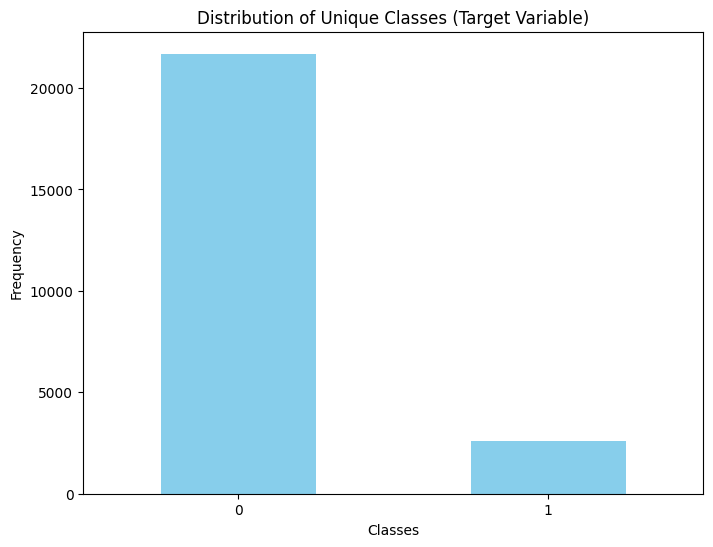

In [74]:
class_counts = df_no_outliers['readmitted'].value_counts()

# Plot the distribution of unique classes
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Classes (Target Variable)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

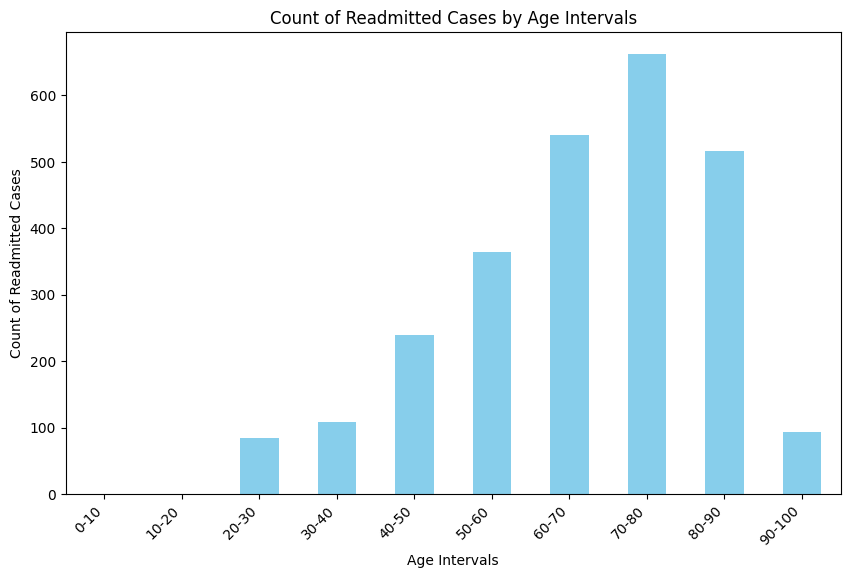

In [75]:
age_intervals = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Group data by age intervals and count readmitted cases
readmitted_counts = df_no_outliers.groupby('age')['readmitted'].sum()

# Convert age intervals to corresponding labels
readmitted_counts.index = age_labels

# Plot the count of readmitted cases against age intervals
plt.figure(figsize=(10, 6))
readmitted_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Intervals')
plt.ylabel('Count of Readmitted Cases')
plt.title('Count of Readmitted Cases by Age Intervals')
plt.xticks(rotation=45, ha='right')
plt.show()



<Figure size 1400x400 with 0 Axes>

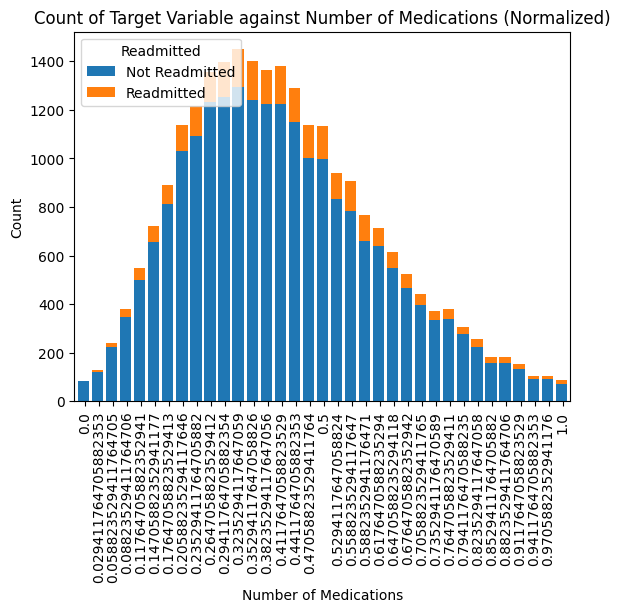

In [76]:
target_counts = df_no_outliers.groupby('num_medications')['readmitted'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14,4))
bars = target_counts.plot(kind='bar', stacked=True, width=0.8, align='center')  # Set align='center' to align bars to tick labels

# Get the current positions of the bars
positions = np.arange(len(target_counts))

# Manually adjust the positions of the bars
plt.xticks(positions + 0.2 * (len(target_counts.columns) - 1) / 2, target_counts.index)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Count of Target Variable against Number of Medications (Normalized)')
plt.legend(title='Readmitted', loc='upper left', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x600 with 0 Axes>

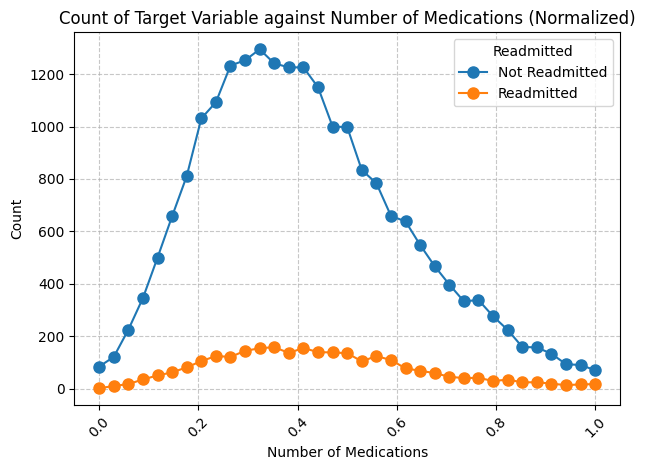

In [77]:
target_counts = df_no_outliers.groupby('num_medications')['readmitted'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
target_counts.plot(kind='line', marker='o', markersize=8)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Count of Target Variable against Number of Medications (Normalized)')
plt.legend(title='Readmitted', loc='upper right', labels=['Not Readmitted', 'Readmitted'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


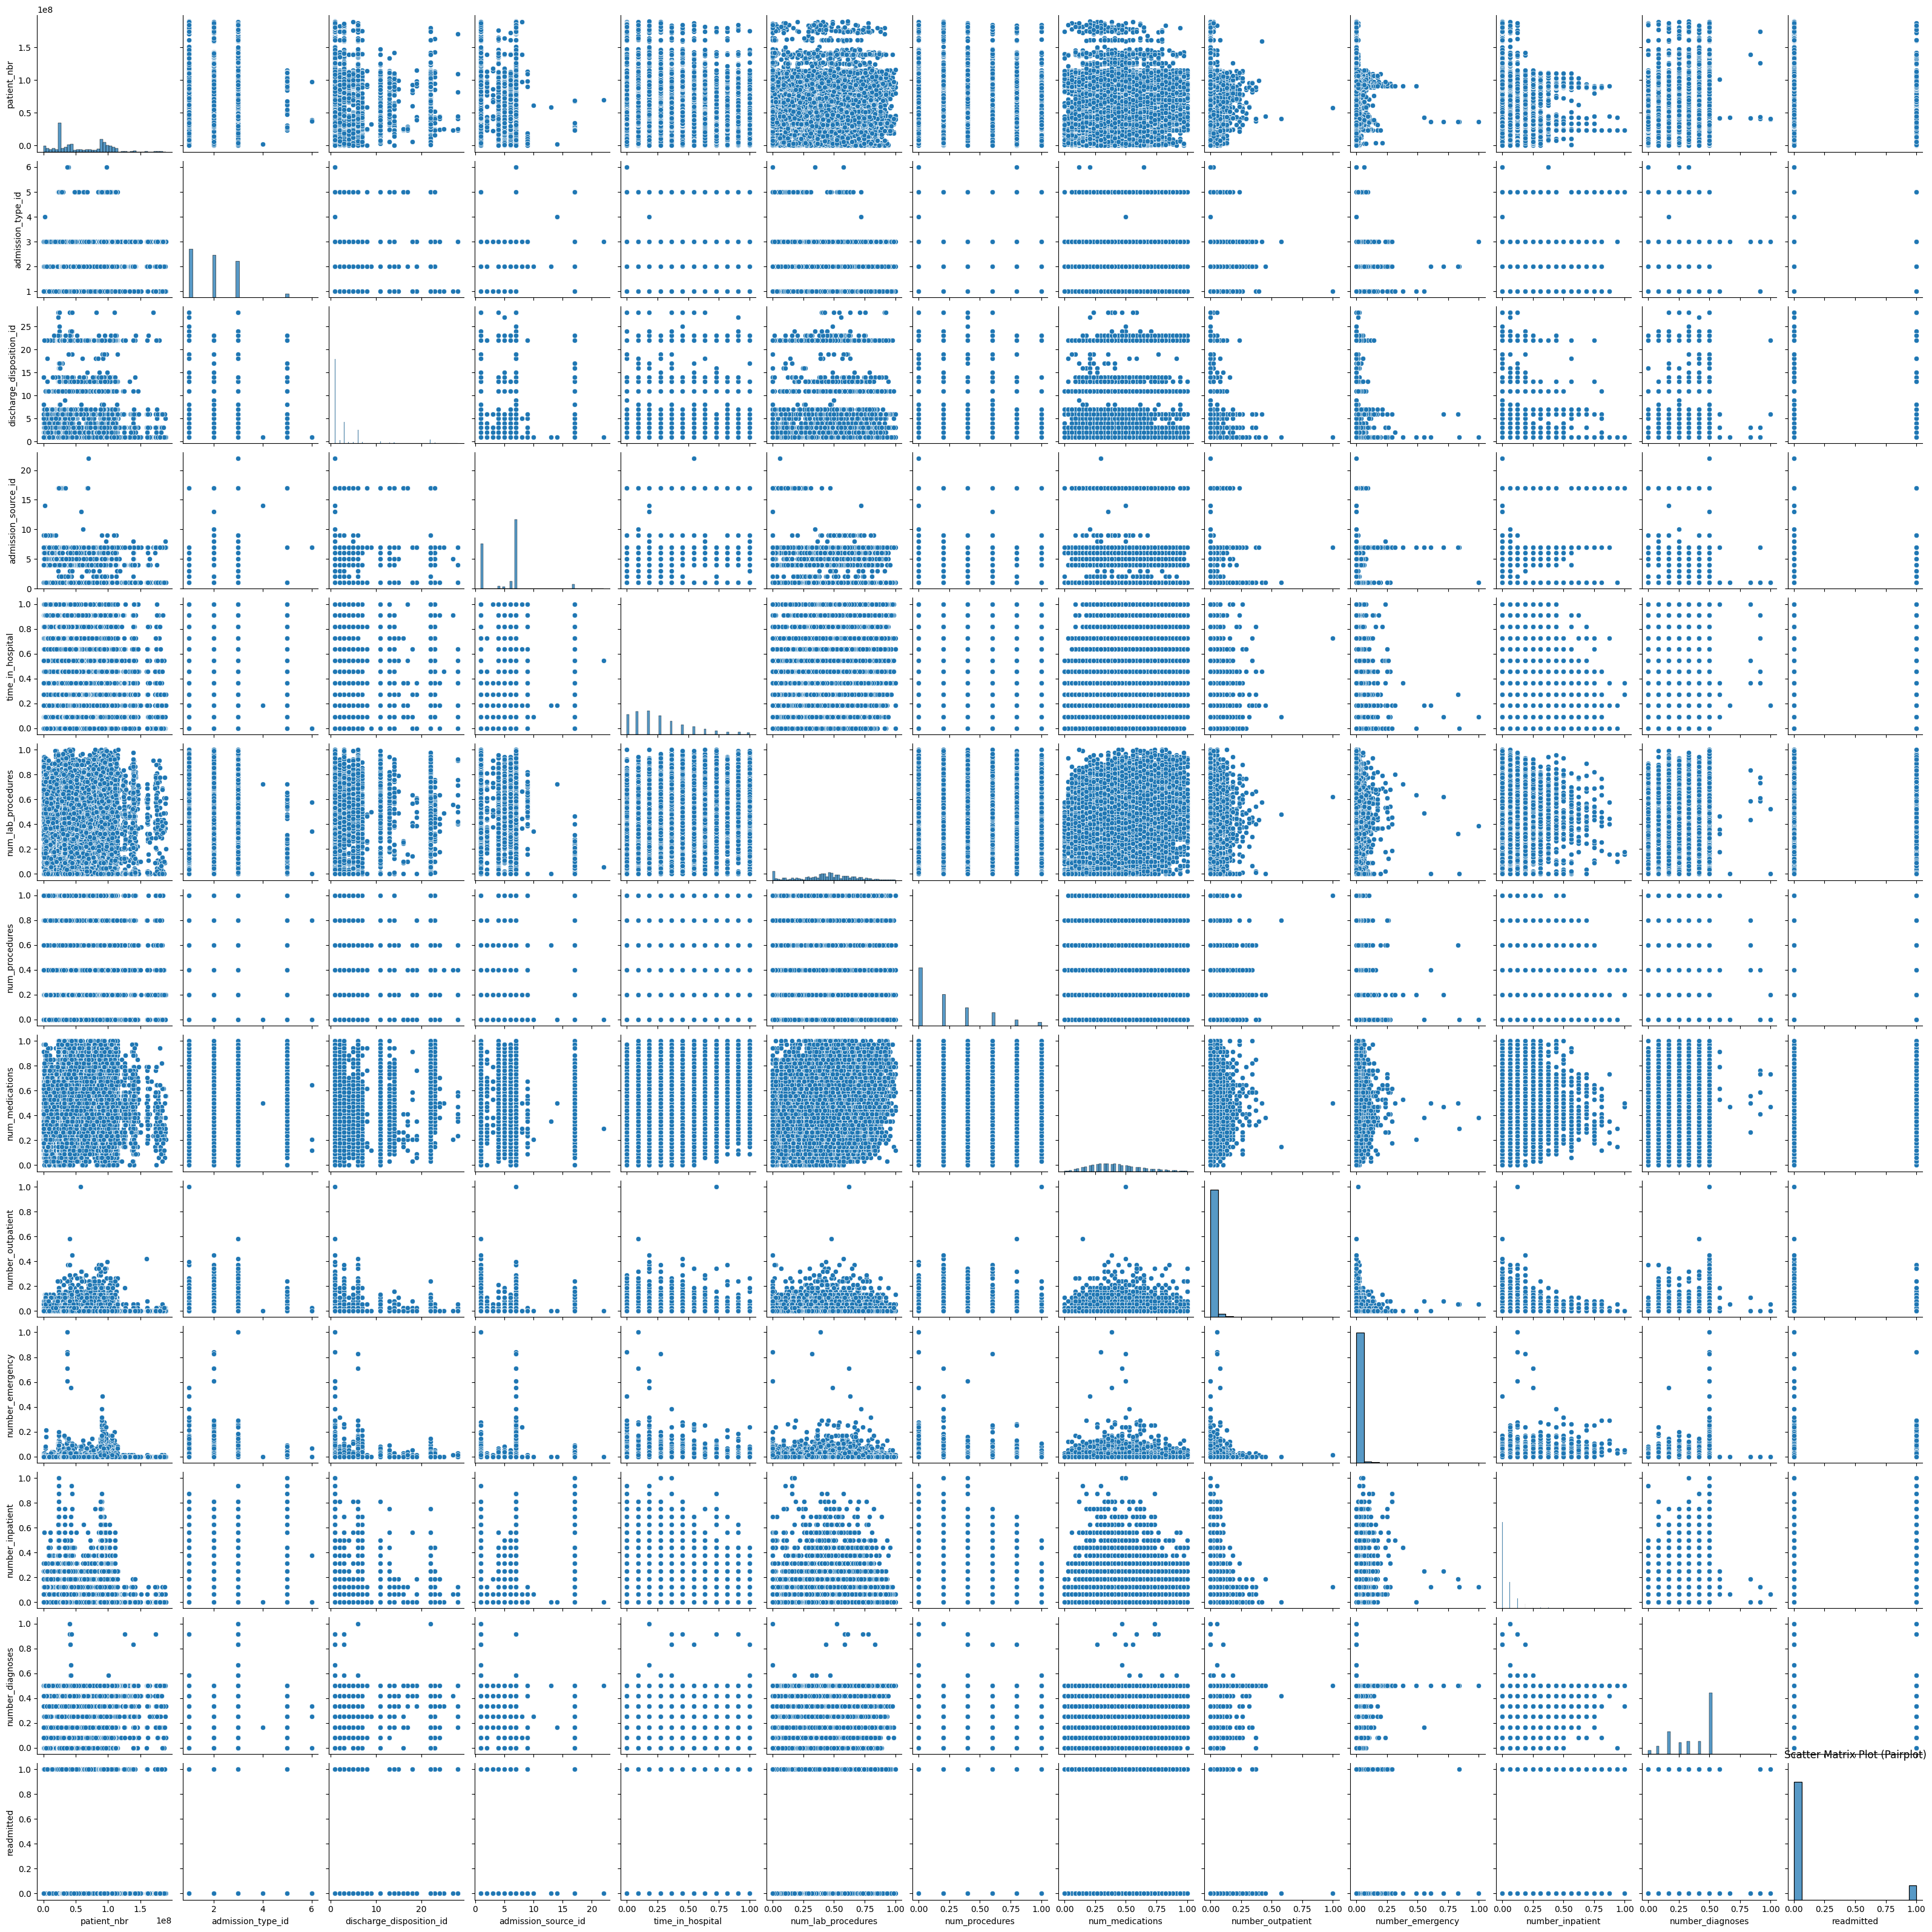

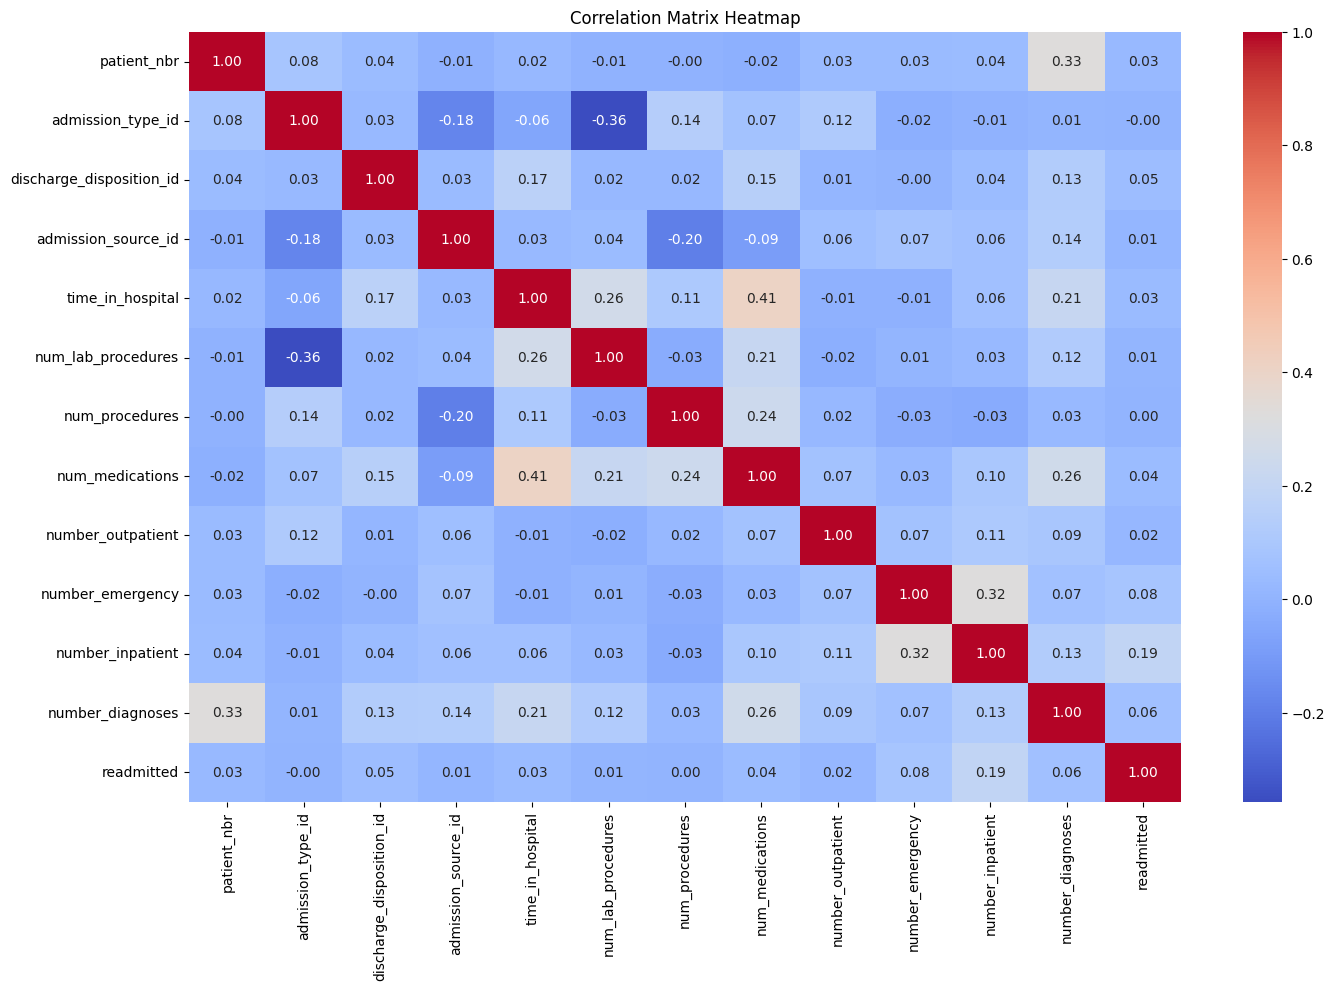

In [78]:
import seaborn as sns
sns.pairplot(df_no_outliers)
plt.title('Scatter Matrix Plot (Pairplot)')
plt.show()

correlation_matrix = df_no_outliers.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [79]:
df_no_outliers.shape

(24299, 31)

In [80]:
print(df_no_outliers.columns)

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [81]:
print(df_no_outliers.select_dtypes(include=['int64', 'float64']).columns)

Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted'],
      dtype='object')


In [82]:
col_to_normalize = ['number_inpatient','num_medications','num_procedures','num_lab_procedures','time_in_hospital','number_diagnoses','number_outpatient','number_emergency']

def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())
df_no_outliers[col_to_normalize] = df_no_outliers[col_to_normalize].apply(min_max_scaling)

# print(df_no_outliers.head(10))
from IPython.display import display
display(df_no_outliers.head(10))


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,20123568,Caucasian,Female,[70-80),1,22,7,0.545455,MC,Orthopedics-Reconstructive,...,None,No,No,No,Up,No,Steady,Ch,Yes,0
20737,20377854,Caucasian,Female,[60-70),2,1,1,0.181818,MC,Nephrology,...,None,No,No,No,No,No,Steady,No,Yes,0
20824,20408121,Caucasian,Female,[90-100),1,1,7,0.272727,MC,Emergency/Trauma,...,None,No,No,No,No,No,No,No,Yes,0
21083,20542797,Caucasian,Male,[70-80),1,2,7,0.818182,MC,InternalMedicine,...,None,Steady,No,No,No,No,Steady,Ch,Yes,0
23879,7239654,Caucasian,Female,[70-80),1,3,6,1.000000,UN,InternalMedicine,...,>8,No,No,No,No,No,Steady,No,Yes,0
23922,15466212,Caucasian,Male,[70-80),1,3,6,1.000000,MC,InternalMedicine,...,None,No,No,No,No,No,No,No,No,0
24028,2509965,Caucasian,Male,[50-60),2,1,1,0.454545,BC,InternalMedicine,...,None,Steady,No,Steady,No,No,No,Ch,Yes,0
24090,25521759,Caucasian,Male,[70-80),5,6,17,0.181818,MC,Family/GeneralPractice,...,None,No,No,No,Steady,No,Steady,Ch,Yes,0
24091,23464296,Caucasian,Male,[70-80),5,2,17,0.727273,MC,Psychiatry,...,None,No,No,No,No,No,No,No,No,1
24103,23748399,Caucasian,Male,[80-90),5,2,17,0.181818,MC,Cardiology,...,None,No,No,No,No,No,No,No,No,0


In [83]:
df_no_outliers.dtypes

patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
glipizide                    object
glyburide                    object
pioglitazone                 object
rosiglitazone                object
insulin                     

In [84]:
categorical_cols_forLabelEncoding = ['diabetesMed','A1Cresult','max_glu_serum','age']
categorical_cols_forOneHotEncoding = ['medical_specialty','payer_code','admission_type_id','discharge_disposition_id','admission_source_id',
                                      'race','gender','diag_1','diag_2','diag_3','change','insulin','rosiglitazone','pioglitazone','glyburide','glipizide','metformin',]
# col_to_normalize = ['number_inpatient','num_medications','num_procedures','num_lab_procedures','time_in_hospital','number_diagnoses','number_outpatient','number_emergency']
# Label encoding
for feature in categorical_cols_forLabelEncoding:
    df_no_outliers[feature] = pd.factorize(df_no_outliers[feature])[0]

# One-hot encoding
df_no_outliers = pd.get_dummies(df_no_outliers, columns=categorical_cols_forOneHotEncoding, drop_first=True)


print('After Encoding shape :',df_no_outliers.shape)

After Encoding shape : (24299, 1853)


In [85]:
cols_without_specified_dtype = [col for col in df_no_outliers.columns if df_no_outliers[col].dtype not in ['int64', 'float64', 'uint8']]

# Print the columns
print("Columns without 'int64', 'float64', or 'uint8' data types:")
if len(cols_without_specified_dtype) > 0:
    for col in cols_without_specified_dtype:
        print(col)
else:
    print("None as all columns have 'int64', 'float64', or 'uint8' data types.")


Columns without 'int64', 'float64', or 'uint8' data types:
None as all columns have 'int64', 'float64', or 'uint8' data types.


In [86]:
print('unique number values in readmitted:', df_no_outliers['readmitted'].nunique() )
print('unique number values in patient_nbr:', df_no_outliers['patient_nbr'].nunique() )

unique number values in readmitted: 2
unique number values in patient_nbr: 17819


# **Model Building**

train test and validation

In [87]:
# dropping only patient number as it has too many unique values in it and
# not dropping any other col as they all do not have very high correlation with each other or even target variable

X = df_no_outliers.drop(columns=['readmitted','patient_nbr'])
Y = df_no_outliers['readmitted']
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#split the data into 70 training data and 30% temp data
#split the temp data into 50-50 as test and validation data
#achieved 70-15-15 split of train,test and validation

X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='accuracy')*100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Performance Metrics on Validation Set:
Accuracy %: 89.41015089163238
Precision: 0.4473684210526316
Recall: 0.04450261780104712
F1 Score: 0.08095238095238096
ROC AUC Score: 0.5190334112603151

Performance Metrics on Test Set:
Accuracy %: 90.12345679012346
Precision: 0.5384615384615384
Recall: 0.05785123966942149
F1 Score: 0.1044776119402985
ROC AUC Score: 0.5261833894873617

Cross-Validation Scores:
[89.06893004 89.19753086 89.19753086 89.24897119 89.01466427]
Average CV Accuracy: 89.14552544569267




---

**train test and val undersampler**


---



In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_temp, y_train_temp)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy') * 100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Performance Metrics on Validation Set:
Accuracy %: 58.497316636851515
Precision: 0.5576208178438662
Recall: 0.5703422053231939
F1 Score: 0.5639097744360902
ROC AUC Score: 0.5841575891480835

Performance Metrics on Test Set:
Accuracy %: 57.066189624329155
Precision: 0.5679442508710801
Recall: 0.5842293906810035
F1 Score: 0.5759717314487632
ROC AUC Score: 0.5706861239119304

Cross-Validation Scores:
[55.76407507 57.85234899 60.67114094 60.53691275 55.83892617]
Average CV Accuracy: 58.132680785216905




---

**train test and val oversampler**


---



In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_temp, y_train_temp)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Performance Metrics on Validation Set:")
print("Accuracy %:", val_accuracy*100)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)
print("ROC AUC Score:", val_roc_auc)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nPerformance Metrics on Test Set:")
print("Accuracy %:", test_accuracy*100)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC AUC Score:", test_roc_auc)

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy') * 100
print("\nCross-Validation Scores:")
print(cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Performance Metrics on Validation Set:
Accuracy %: 71.0387323943662
Precision: 0.6971027216856892
Recall: 0.7172538392050587
F1 Score: 0.7070347284060553
ROC AUC Score: 0.7105582500746324

Performance Metrics on Test Set:
Accuracy %: 71.01672535211267
Precision: 0.709776413853573
Recall: 0.7119613016710642
F1 Score: 0.7108671789242591
ROC AUC Score: 0.7101656728619639

Cross-Validation Scores:
[70.39115366 70.60571051 72.15252559 71.65731264 70.94750743]
Average CV Accuracy: 71.1508419655276
